<a href="https://colab.research.google.com/github/frogi16/MLP-learning-visualiser/blob/main/RedWineClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [75]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import math

**Manually upload winequality-red.csv into the root directory of system before executing**

In [76]:
#columns:
#    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
#    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
#    "pH", "sulphates", "alcohol", "quality"

data = pd.read_csv (r'/winequality-red.csv', sep=';')

y = pd.DataFrame(data, columns= ['quality']).values.ravel()
X = pd.DataFrame(data)
X = X.drop(columns='quality')

Prepare input

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train model

In [78]:
mlp = MLPClassifier(hidden_layer_sizes=(11, 50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=10,
                    learning_rate_init=.14, early_stopping=True)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 1.34374886
Validation score: 0.508333
Iteration 2, loss = 1.13083920
Validation score: 0.566667
Iteration 3, loss = 1.04910121
Validation score: 0.541667
Iteration 4, loss = 0.99209132
Validation score: 0.583333
Iteration 5, loss = 0.96713917
Validation score: 0.575000
Iteration 6, loss = 0.95147883
Validation score: 0.566667
Iteration 7, loss = 0.94787028
Validation score: 0.550000
Iteration 8, loss = 0.92643733
Validation score: 0.566667
Iteration 9, loss = 0.91892629
Validation score: 0.608333
Iteration 10, loss = 0.90374130
Validation score: 0.600000
Iteration 11, loss = 0.89274159
Validation score: 0.608333
Iteration 12, loss = 0.88550582
Validation score: 0.608333
Iteration 13, loss = 0.87822497
Validation score: 0.616667
Iteration 14, loss = 0.86073790
Validation score: 0.600000
Iteration 15, loss = 0.87088428
Validation score: 0.616667
Iteration 16, loss = 0.85730462
Validation score: 0.608333
Iteration 17, loss = 0.84640372
Validation score: 0.641667
Iterat

Output results

Training set score: 0.676397
Test set score: 0.532500
[[  0   0   1   0   0   0]
 [  0   0   8   5   0   0]
 [  0   1 127  34   2   0]
 [  0   0  67  70  32   0]
 [  0   0   1  31  16   0]
 [  0   0   0   1   4   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.77      0.69       164
           6       0.50      0.41      0.45       169
           7       0.30      0.33      0.31        48
           8       0.00      0.00      0.00         5

    accuracy                           0.53       400
   macro avg       0.24      0.25      0.24       400
weighted avg       0.50      0.53      0.51       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


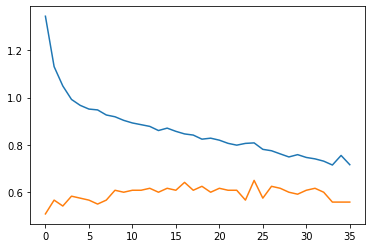

In [79]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

plt.plot(mlp.loss_curve_)
plt.plot(mlp.validation_scores_)

#for coeff_map in mlp.coefs_:
#  print("-------------------")
#  for coeff in coeff_map:
#    print("---" + str(coeff))